In [136]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, datasets
from sklearn.model_selection import cross_val_score
from tparbressource import *
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Generate data
def generateBalancedClassesData(n):
    cl=int(n/4)
    data = rand_checkers(n1=cl, n2=cl, n3=cl, n4=cl)
    return data

data = generateBalancedClassesData(456)
# No need for test / train splitting, for now we are only going to train
X = data[:,:2]
y = data[:,-1]

In [139]:
def testTreesByDepth(X, y, max_depth=10, criterion='gini', cv=1):
    # Initialize results
    res = []
    clf_l = []
    
    for i in range(1,max_depth):
        # Create classifier
        clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
        # Store them for future use 
        clf_l.append(clf)
        # Train classifier
        clf.fit(X, y)
        # Computing accuracy score on the same data as before will give the percentage 
        # of errors on train data. Obviously error % is 1 - accuracy
        if cv > 1:
            score = cross_val_score(clf, X, y, cv=cv)
        else:
            score = clf.score(X, y)
        err = (1 - score)
        res.append(err)
        
    return res, clf_l
    
res_g, clf_g_l = testTreesByDepth(X, y, max_depth=25, criterion='gini')
res_e, clf_e_l = testTreesByDepth(X, y, max_depth=25, criterion='entropy')

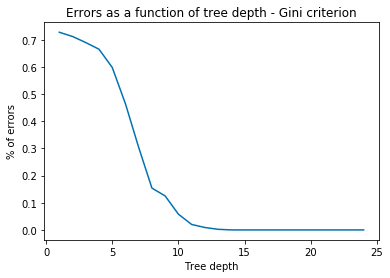

In [140]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_g))

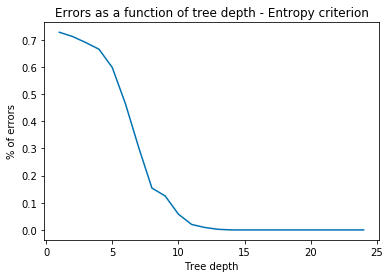

In [141]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_e))

In [142]:
# Depth minimizing error
depth_minerr = res_e.index(min(res_e)) + 1
depth_minerr

14

In [143]:
clf_minerr = DecisionTreeClassifier(criterion='entropy', max_depth=depth_minerr)
clf_minerr.fit(X, y)
clf_minerr.feature_importances_

array([0.53017397, 0.46982603])

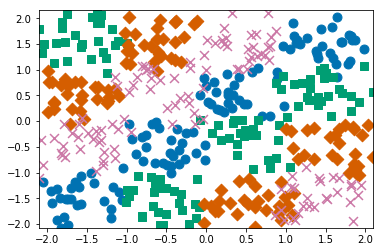

In [144]:
y=clf_minerr.predict(X)
plot_2d(X, y)

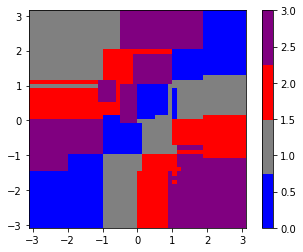

In [145]:
frontiere(clf_minerr.predict, X)
plt.show()

In [146]:
d = np.hstack((X, y[:, np.newaxis]))

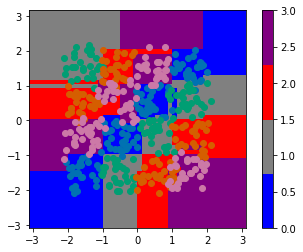

In [147]:
color_blind_list = sns.color_palette("colorblind", 4)

plt.figure()
frontiere(clf_minerr.predict, X)
for i in range(4):
    plt.scatter(d[d[:,2]==i, 0], d[d[:,2] == i, 1], c=color_blind_list[i])
plt.show()

In [148]:
out_file = open("./tree_description.dot", 'w')
tree.export_graphviz(clf_minerr, out_file=out_file)
out_file.close()

In [149]:
# Generate new data
data2 = generateBalancedClassesData(160)
X2 = data2[:,:2]
y2 = data2[:,-1]

# Initialize results
res_g2 = []
res_e2 = []

for i in range(0, max_depth-1):
    clf_e = clf_e_l[i]
    clf_g = clf_g_l[i]
    err_g = (1 - clf_g.score(X2, y2))
    err_e = (1 - clf_e.score(X2, y2))
    res_g2.append(err_g)
    res_e2.append(err_e)

NameError: name 'generateBalancedClassesData' is not defined

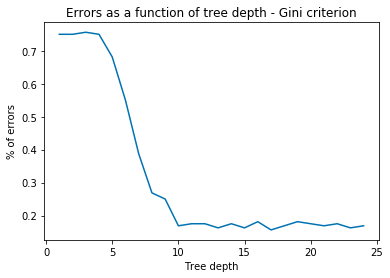

In [128]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_g2))

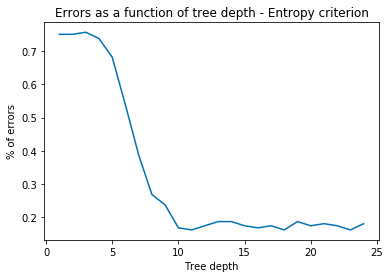

In [129]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_e2))

In [150]:
digits = datasets.load_digits()

In [151]:
res_g, clf_g = testTreesByDepth(digits.data, digits.target, max_depth=25, criterion='gini')
res_e, clf_e = testTreesByDepth(digits.data, digits.target, max_depth=25, criterion='entropy')

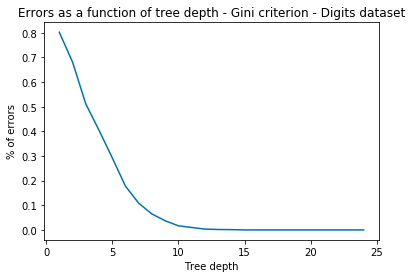

In [152]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion - Digits dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_g))

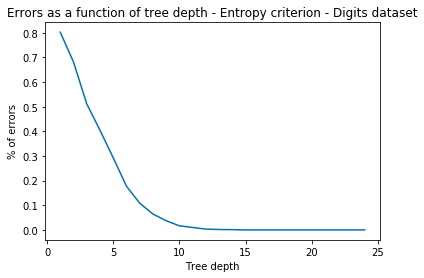

In [153]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion - Digits dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_g))

In [154]:
# Depth minimizing error
depth_minerr = res_e.index(min(res_e)) + 1
depth_minerr

15

In [157]:
res_g

[0.80189204229271,
 0.681135225375626,
 0.5114079020589872,
 0.4045631608235949,
 0.29271007234279356,
 0.17751808569838623,
 0.10851419031719534,
 0.06455203116304953,
 0.037284362826933815,
 0.016694490818030094,
 0.01001669449081799,
 0.0033388981636059967,
 0.0016694490818029983,
 0.0011129660545353692,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [158]:
res_g10

[array([0.8       , 0.79781421, 0.80110497, 0.8       , 0.81005587,
        0.79888268, 0.80446927, 0.80337079, 0.8079096 , 0.80113636]),
 array([0.68108108, 0.70491803, 0.70718232, 0.68888889, 0.68715084,
        0.69273743, 0.69832402, 0.65730337, 0.64971751, 0.68181818]),
 array([0.57837838, 0.54098361, 0.62430939, 0.53888889, 0.52513966,
        0.50837989, 0.53072626, 0.50561798, 0.51412429, 0.52840909]),
 array([0.4972973 , 0.46994536, 0.5359116 , 0.46111111, 0.41340782,
        0.41340782, 0.44134078, 0.4494382 , 0.43502825, 0.44886364]),
 array([0.4       , 0.33333333, 0.4198895 , 0.40555556, 0.34078212,
        0.29050279, 0.34636872, 0.29775281, 0.32768362, 0.38068182]),
 array([0.2972973 , 0.23497268, 0.28176796, 0.31111111, 0.30167598,
        0.18435754, 0.18994413, 0.25842697, 0.25988701, 0.28977273]),
 array([0.26486486, 0.16939891, 0.19889503, 0.27222222, 0.26256983,
        0.13407821, 0.12849162, 0.21348315, 0.20338983, 0.25      ]),
 array([0.23783784, 0.15300546, 0.